Artifical Neural Network Model for predicting annual income

About the dataset

The US census dataset has 32561 rows and 14 columns with information about age, employment status of an individual, education level, number of years of education, marital status, occupation, relationship to their family members, sex, the final weight or number of people the census believes the entry represents, capital gains and losses, native country, hours worked per week and whether the individual earns above or below $50,000 per annum (the label). 

The goal of the present task is to use the attributes available in the dataset to build a machine learning model to predict whether an individual is likely to earn above or below $50,000. The data has already been cleaned and categorical variables have been encoded, so the Artificial Neural Network model can directly be trained.

About Artificial Neural Networks (ANN)
An Artificial Neural Network (ANN) is a computational model inspired by the structure and function of biological neural networks. ANNs are composed of interconnected artificial neurons or nodes that process and transmit information.
ANNs are typically organized into layers, including an input layer, one or more hidden layers, and an output layer. The input layer receives data from the external environment, and the output layer produces the final output or prediction. The hidden layers, located between the input and output layers, perform intermediate computations and feature extraction. Training an ANN involves the network adjusting its internal parameters or weights, which enables the network to learn patterns, relationships, and associations within the provided data and generalize its knowledge to make predictions or classifications on unseen data.
We start by splitting the dataset into train, validation and test data and then scaling them. A validation dataset refers to a separate portion of the available data that is used to assess the performance of the trained network during the training process (as using the training data itself for this purpose will cause overfitting).

In [3]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import LearningRateScheduler


In [4]:
#Read data as pandas dataframe
new_df = pd.read_csv("new_df.csv")

new_df.head()

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,sex,native-country,income
0,90,40,3.0,11.0,6.0,9.0,1.0,0.0,38.0,0.0
1,82,18,3.0,11.0,6.0,3.0,1.0,0.0,38.0,0.0
2,66,40,3.0,15.0,6.0,9.0,4.0,0.0,38.0,0.0
3,54,40,3.0,5.0,0.0,6.0,4.0,0.0,38.0,0.0
4,41,40,3.0,15.0,5.0,9.0,3.0,0.0,38.0,0.0


In [5]:
# Splitting and scaling train, validation and test data

#dependent and independent features
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

#splitting to train, validation and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=7,test_size=0.33)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5, random_state=42)

#feature Scaling
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)


The next step is to initialize the ANN using the Keras library, which is a high-level neural networks API written in Python and integrated into TensorFlow. We define the network architecture (Sequential model from Keras Library) and then add on the layers and specify the activation function for these layers. The Rectified Linear Unit (ReLU) activation function is a popular choice for hidden layers as it introduces non-linearity, allowing the network to learn complex patterns effectively. The sigmoid activation is used for the output layer, particularly in case of binary classification.

In [6]:
#initialising ANN
ann= tf.keras.models.Sequential()

#adding input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation = "relu", input_dim = 9))

#Adding second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))

#adding Output layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

#compiling ANN
ann.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ['accuracy'])


We then compile the Artificial Neural Network in Keras with specific settings for optimization, loss function, and evaluation metrics. We use Adaptive Moment Estimation (Adam), a popular optimization algorithm that dynamically adjusts the learning rate and provides good performance for a wide range of problems. The loss parameter specifies the loss function to be minimized during training. The metrics parameter specifies the evaluation metrics to be computed during training and testing, in this case, accuracy. We then fit the model, specifying parameters such as batch size and epochs, and finally evaluate the model on test data by calculating loss and accuracy.

In [7]:
#fitting ANN
history= ann.fit(X_train,y_train, validation_data=(X_val, y_val), batch_size=32,epochs=20)

Epoch 1/20
682/682 [==============================] - 5s 3ms/step - loss: 0.5424 - accuracy: 0.7118 - val_loss: 0.4729 - val_accuracy: 0.7700
Epoch 2/20
682/682 [==============================] - 2s 2ms/step - loss: 0.4467 - accuracy: 0.7733 - val_loss: 0.4316 - val_accuracy: 0.7744
Epoch 3/20
682/682 [==============================] - 2s 3ms/step - loss: 0.4223 - accuracy: 0.7839 - val_loss: 0.4171 - val_accuracy: 0.7876
Epoch 4/20
682/682 [==============================] - 2s 3ms/step - loss: 0.4133 - accuracy: 0.7872 - val_loss: 0.4099 - val_accuracy: 0.7912
Epoch 5/20
682/682 [==============================] - 2s 3ms/step - loss: 0.4081 - accuracy: 0.7910 - val_loss: 0.4049 - val_accuracy: 0.7949
Epoch 6/20
682/682 [==============================] - 3s 4ms/step - loss: 0.4049 - accuracy: 0.7921 - val_loss: 0.4026 - val_accuracy: 0.7971
Epoch 7/20
682/682 [==============================] - 2s 3ms/step - loss: 0.4022 - accuracy: 0.7936 - val_loss: 0.3997 - val_accuracy: 0.7958
Epoch 

In [8]:
#predicting result for single observation

print(ann.predict(sc.transform([[1,0,0,600,1,40,3,6000,2]]))<0.5)

c:\Users\LENOVO\anaconda3\envs\ct7201\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[ True]]


In [9]:
# evaluating the model on test data
loss, acc = ann.evaluate(X_test, y_test)
print('Test Accuracy: %F' % (acc*100))

168/168 [==============================] - 0s 3ms/step - loss: 0.3941 - accuracy: 0.8063
Test Accuracy: 80.625349


In [10]:
ann.save("ANN.inc")

INFO:tensorflow:Assets written to: ANN.inc\assets


Loss represents the discrepancy between the predicted output of the model and the true output value, that is, it quantifies the error of the model's predictions during training. The goal of training the ANN is to minimize the loss by adjusting the model's parameters (weights and biases). Accuracy measures the proportion of correctly predicted instances compared to the total number of instances.

In the above code, note the hyperparameters batch size and epoch. An epoch refers to a complete iteration over the entire training dataset during the training of a machine learning model. One epoch means that the model has seen and learned from every training example once.
The batch size refers to the number of training examples processed together before the model updates its parameters. Instead of feeding the entire training dataset into the model at once, it's divided into smaller subsets called batches. On experimenting with different epochs and batch sizes, we find that the ANN model with the highest accuracy to be - epoch 100, batch size 32 (0.38 loss and 0.815 accuracy). Therefore, it is able to make accurate predictions 81.5% of the time. We also plot grpahs to visualise the loss and accuracy of training models with different epochs and batch size.

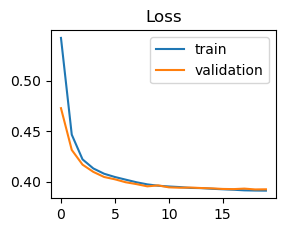

In [11]:
#plotting loss
from matplotlib import pyplot
pyplot.subplot(221)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'],label = 'validation')
pyplot.legend()

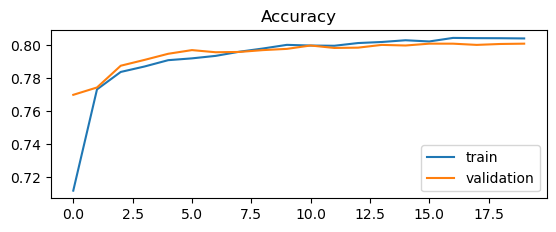

In [12]:
#plotting accuracy
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label = 'train')
pyplot.plot(history.history['val_accuracy'], label = 'validation')
pyplot.legend()
pyplot.show()

We now try different batch sizes and epochs to see which has best results.

In [13]:
#fitting ANN
history_2= ann.fit(X_train,y_train, validation_data=(X_val, y_val), batch_size=32,epochs=50)

Epoch 1/50
682/682 [==============================] - 2s 3ms/step - loss: 0.3908 - accuracy: 0.8033 - val_loss: 0.3924 - val_accuracy: 0.7999
Epoch 2/50
682/682 [==============================] - 2s 3ms/step - loss: 0.3906 - accuracy: 0.8044 - val_loss: 0.3925 - val_accuracy: 0.8010
Epoch 3/50
682/682 [==============================] - 2s 3ms/step - loss: 0.3903 - accuracy: 0.8050 - val_loss: 0.3926 - val_accuracy: 0.8010
Epoch 4/50
682/682 [==============================] - 2s 3ms/step - loss: 0.3900 - accuracy: 0.8052 - val_loss: 0.3929 - val_accuracy: 0.8005
Epoch 5/50
682/682 [==============================] - 2s 3ms/step - loss: 0.3897 - accuracy: 0.8044 - val_loss: 0.3938 - val_accuracy: 0.7997
Epoch 6/50
682/682 [==============================] - 2s 3ms/step - loss: 0.3895 - accuracy: 0.8038 - val_loss: 0.3931 - val_accuracy: 0.8007
Epoch 7/50
682/682 [==============================] - 2s 3ms/step - loss: 0.3892 - accuracy: 0.8041 - val_loss: 0.3921 - val_accuracy: 0.8022
Epoch 

In [14]:
# evaluating the model on test data
loss, acc = ann.evaluate(X_test, y_test)
print('Test Accuracy: %F' % (acc*100))

168/168 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8079
Test Accuracy: 80.792850


In [15]:
#fitting ANN - reduced batch size
history_2r= ann.fit(X_train,y_train, validation_data=(X_val, y_val), batch_size=20,epochs=50)

Epoch 1/50
1091/1091 [==============================] - 4s 3ms/step - loss: 0.3860 - accuracy: 0.8070 - val_loss: 0.3920 - val_accuracy: 0.8063
Epoch 2/50
1091/1091 [==============================] - 3s 3ms/step - loss: 0.3857 - accuracy: 0.8094 - val_loss: 0.3930 - val_accuracy: 0.7999
Epoch 3/50
1091/1091 [==============================] - 3s 3ms/step - loss: 0.3859 - accuracy: 0.8057 - val_loss: 0.3931 - val_accuracy: 0.7996
Epoch 4/50
1091/1091 [==============================] - 3s 3ms/step - loss: 0.3853 - accuracy: 0.8093 - val_loss: 0.3925 - val_accuracy: 0.8042
Epoch 5/50
1091/1091 [==============================] - 3s 3ms/step - loss: 0.3857 - accuracy: 0.8072 - val_loss: 0.3937 - val_accuracy: 0.8018
Epoch 6/50
1091/1091 [==============================] - 3s 3ms/step - loss: 0.3855 - accuracy: 0.8075 - val_loss: 0.3930 - val_accuracy: 0.8035
Epoch 7/50
1091/1091 [==============================] - 3s 3ms/step - loss: 0.3854 - accuracy: 0.8074 - val_loss: 0.3940 - val_accuracy:

In [16]:
# evaluating the model on test data
loss, acc = ann.evaluate(X_test, y_test)
print('Test Accuracy: %F' % (acc*100))

168/168 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.8141
Test Accuracy: 81.407034


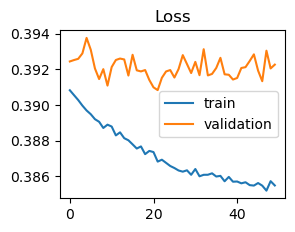

In [17]:
#plotting loss (50 epoch)
from matplotlib import pyplot
pyplot.subplot(221)
pyplot.title('Loss')
pyplot.plot(history_2.history['loss'], label = 'train')
pyplot.plot(history_2.history['val_loss'],label = 'validation')
pyplot.legend()

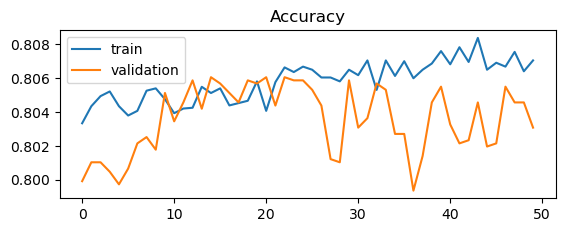

In [18]:
#plotting accuracy
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history_2.history['accuracy'], label = 'train')
pyplot.plot(history_2.history['val_accuracy'], label = 'validation')
pyplot.legend()
pyplot.show()

In [19]:
#fitting ANN
history_3= ann.fit(X_train,y_train, validation_data=(X_val, y_val), batch_size=32,epochs=100)

Epoch 1/100
682/682 [==============================] - 2s 2ms/step - loss: 0.3829 - accuracy: 0.8113 - val_loss: 0.3908 - val_accuracy: 0.8027
Epoch 2/100
682/682 [==============================] - 2s 3ms/step - loss: 0.3829 - accuracy: 0.8099 - val_loss: 0.3907 - val_accuracy: 0.8066
Epoch 3/100
682/682 [==============================] - 2s 3ms/step - loss: 0.3832 - accuracy: 0.8103 - val_loss: 0.3902 - val_accuracy: 0.8074
Epoch 4/100
682/682 [==============================] - 2s 3ms/step - loss: 0.3832 - accuracy: 0.8118 - val_loss: 0.3900 - val_accuracy: 0.8055
Epoch 5/100
682/682 [==============================] - 2s 3ms/step - loss: 0.3830 - accuracy: 0.8103 - val_loss: 0.3912 - val_accuracy: 0.8023
Epoch 6/100
682/682 [==============================] - 2s 3ms/step - loss: 0.3832 - accuracy: 0.8103 - val_loss: 0.3896 - val_accuracy: 0.8089
Epoch 7/100
682/682 [==============================] - 2s 3ms/step - loss: 0.3830 - accuracy: 0.8110 - val_loss: 0.3911 - val_accuracy: 0.8048

In [20]:
# evaluating the model on test data
loss, acc = ann.evaluate(X_test, y_test)
print('Test Accuracy: %F' % (acc*100))

168/168 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8139
Test Accuracy: 81.388426


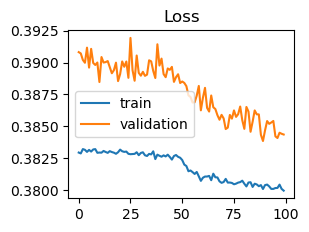

In [21]:
#plotting loss

pyplot.subplot(221)
pyplot.title('Loss')
pyplot.plot(history_3.history['loss'], label = 'train')
pyplot.plot(history_3.history['val_loss'],label = 'validation')
pyplot.legend()

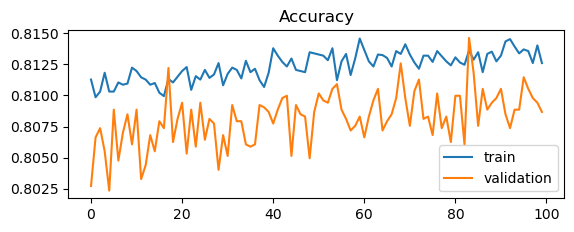

In [22]:
#plotting accuracy
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history_3.history['accuracy'], label = 'train')
pyplot.plot(history_3.history['val_accuracy'], label = 'validation')
pyplot.legend()
pyplot.show()

In [23]:
predictions = ann.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy: %.2f%%" % (accuracy * 100))

Accuracy: 81.39%


The loss function should generally decrease as the training progresses as this indicates that the model is learning from the data and improving its predictions. For an effective model, it should converge smoothly to a minimum, without encountering significant fluctuations or instability. At some point during the training process, the loss function may stabilize or reach a plateau. This indicates that the model has learned as much as it can from the available data.
As we can see, there is a general downward trend observed in the loss graph and an upward trend in the accuracy graph, but these show significant fluctuations. This suggests that the model is making progress in learning and improving its performance over time. However, the fluctuations indicate that the model's performance is not consistently improving with each training iteration. There could be many possible reasons for this. One explanation is that the learning rate is too high, causing the model to overshoot the optimal solution, leading to fluctuations in the accuracy. We will thus try to optimize the ANN model through learning rate scheduling.

Optimising the ANN with Learning Rate Scheduling
The learning rate is a hyperparameter that determines the step size at which the model's parameters (weights and biases) are updated during the training process (Geron, 2022). It controls how quickly or slowly the model learns from the training data and adjusts its internal parameters to minimize the loss function.
Using the LearningRateScheduler callback provided by TensorFlow, we can update the code for ANN to include learning rate scheduling

In [24]:

# Define a learning rate schedule function
def lr_schedule(epoch):
    initial_lr = 0.001  # Initial learning rate
    
    if epoch < 50:
        return initial_lr
    elif epoch < 80:
        return initial_lr * 0.1
    else:
        return initial_lr * 0.01

# Initializing ANN
ann = tf.keras.models.Sequential()

# Adding input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=9))

# Adding second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))

# Adding output layer
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compiling ANN
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

# Creating a learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Fitting ANN with learning rate scheduling
history_lrs = ann.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=100, callbacks=[lr_scheduler])


Epoch 1/100
682/682 [==============================] - 5s 4ms/step - loss: 0.5115 - accuracy: 0.7399 - val_loss: 0.4497 - val_accuracy: 0.7767 - lr: 0.0010
Epoch 2/100
682/682 [==============================] - 2s 3ms/step - loss: 0.4289 - accuracy: 0.7765 - val_loss: 0.4179 - val_accuracy: 0.7875 - lr: 0.0010
Epoch 3/100
682/682 [==============================] - 2s 3ms/step - loss: 0.4130 - accuracy: 0.7874 - val_loss: 0.4106 - val_accuracy: 0.7880 - lr: 0.0010
Epoch 4/100
682/682 [==============================] - 2s 3ms/step - loss: 0.4075 - accuracy: 0.7905 - val_loss: 0.4066 - val_accuracy: 0.7908 - lr: 0.0010
Epoch 5/100
682/682 [==============================] - 2s 3ms/step - loss: 0.4043 - accuracy: 0.7925 - val_loss: 0.4038 - val_accuracy: 0.7919 - lr: 0.0010
Epoch 6/100
682/682 [==============================] - 2s 3ms/step - loss: 0.4021 - accuracy: 0.7939 - val_loss: 0.4022 - val_accuracy: 0.7938 - lr: 0.0010
Epoch 7/100
682/682 [==============================] - 2s 3ms/st

In [25]:
# evaluating the model on test data
loss, acc = ann.evaluate(X_test, y_test)
print('Test Accuracy: %F' % (acc*100))

168/168 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8154
Test Accuracy: 81.537318


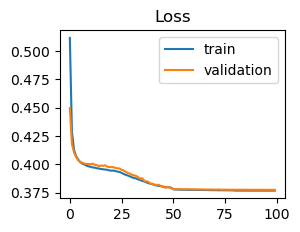

In [26]:
#plotting loss

pyplot.subplot(221)
pyplot.title('Loss')
pyplot.plot(history_lrs.history['loss'], label = 'train')
pyplot.plot(history_lrs.history['val_loss'],label = 'validation')
pyplot.legend()

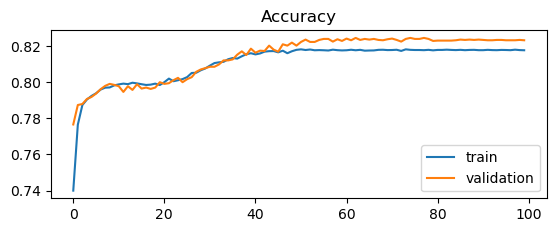

In [27]:
#plotting accuracy
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history_lrs.history['accuracy'], label = 'train')
pyplot.plot(history_lrs.history['val_accuracy'], label = 'validation')
pyplot.legend()
pyplot.show()

In [ ]:
We can see that optimisation has made the models performance more stable.